# Practical Exam: House sales

RealAgents is a real estate company that focuses on selling houses.

RealAgents sells a variety of types of house in one metropolitan area.

Some houses sell slowly and sometimes require lowering the price in order to find a buyer.

In order to stay competitive, RealAgents would like to optimize the listing prices of the houses it is trying to sell.

They want to do this by predicting the sale price of a house given its characteristics.

If they can predict the sale price in advance, they can decrease the time to sale.


## Data

The dataset contains records of previous houses sold in the area.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton'. </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced" (two shared walls), "Semi-detached" (one shared wall), or "Detached" (no shared walls). </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |


# Task 1

The team at RealAgents knows that the city that a property is located in makes a difference to the sale price. 

Unfortuntately they believe that this isn't always recorded in the data. 

Calculate the number of missing values of the `city`. 

 - You should use the data in the file "house_sales.csv". 

 - Your output should be an object `missing_city`, that contains the number of missing values in this column. 

In [1]:
# Use this cell to write your code for Task 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style()
#  Preset options: "white", "dark", "whitegrid", "darkgrid", "ticks"
# Load the data
house_sales = pd.read_csv("house_sales.csv")

In [2]:
house_sales.describe()

,house_id,sale_price,months_listed,bedrooms
count,1.500000e+03,1500.000000,1469.000000,1500.000000
mean,1.501071e+06,228121.500000,5.901498,4.018000
std,2.835584e+05,117908.147306,1.954070,1.413391
min,1.000296e+06,26348.000000,0.500000,2.000000
25%,1.258978e+06,127470.750000,4.500000,3.000000
50%,1.509208e+06,230058.500000,5.900000,4.000000
75%,1.734578e+06,316793.500000,7.200000,5.000000
max,1.999721e+06,509536.000000,12.300000,6.000000


In [3]:
house_sales['city'].value_counts()

city
Silvertown    517
Teasdale      366
Poppleton     362
Riverford     182
--             73
Name: count, dtype: int64

In [4]:
house_sales.replace('--',np.nan,inplace=True)

In [5]:
house_sales.isna().sum()

house_id          0
city             73
sale_price        0
sale_date         0
months_listed    31
bedrooms          0
house_type        0
area              0
dtype: int64

In [6]:
# Calculate the number of missing values in the 'city' column
missing_city = house_sales['city'].isnull().sum()

# Convert missing_city to an object data type
missing_city = missing_city.astype('object')

print(missing_city)

73


In [7]:
house_sales.dtypes

house_id           int64
city              object
sale_price         int64
sale_date         object
months_listed    float64
bedrooms           int64
house_type        object
area              object
dtype: object

# Task 2 

Before you fit any models, you will need to make sure the data is clean. 

The table below shows what the data should look like. 

Create a cleaned version of the dataframe. 

 - You should start with the data in the file "house_sales.csv". 

 - Your output should be a dataframe named `clean_data`. 

 - All column names and values should match the table below.


| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton' </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced", "Semi-detached", or "Detached". </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |

In [8]:
# Replace various representations of missing values with NaN
missing_values = ['-','--','', 'missing,','NA',None, 'missing', 'N/A', 'NULL']
house_sales.replace(missing_values, np.nan,inplace=True)

In [9]:
house_sales.isna().sum()

house_id          0
city             73
sale_price        0
sale_date         0
months_listed    31
bedrooms          0
house_type        0
area              0
dtype: int64

In [10]:
house_sales['house_type'].value_counts()

house_type
Detached         1046
Semi-detached     231
Terraced          123
Det.               78
Semi               14
Terr.               8
Name: count, dtype: int64

In [11]:
house_sales.head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8 sq.m.
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8 sq.m.
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5 sq.m.
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Det.,528.4 sq.m.
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1 sq.m.


In [12]:
house_sales['bedrooms'].value_counts()

bedrooms
3    314
6    306
5    305
2    288
4    287
Name: count, dtype: int64

In [13]:
# Use this cell to write your code for Task 2
import pandas as pd
import numpy as np


house_sales['house_id'] = house_sales['house_id'].astype(str)

# Replace missing values in 'city' with "Unknown"
house_sales['city'].fillna("Unknown", inplace=True)

# Remove rows with missing 'sale_price'
house_sales = house_sales[house_sales['sale_price'].notna()]

# Replace missing values in 'sale_date' with '2023-01-01'
house_sales['sale_date'].fillna("2023-01-01", inplace=True)

# Convert 'Date' column to datetime
house_sales['sale_date'] = pd.to_datetime(house_sales['sale_date'])

# Convert 'Date' column to ordinal
house_sales['sale_date'] = house_sales['sale_date'].apply(lambda date: date.toordinal())

# Replace missing values in 'months_listed' with the mean, rounded to one decimal place
mean_months_listed = house_sales['months_listed'].mean().round(1)
house_sales['months_listed'].fillna(mean_months_listed, inplace=True)

# Replace missing values in 'bedrooms' with the mean, rounded to the nearest integer
mean_bedrooms = house_sales['bedrooms'].mean().round()
house_sales['bedrooms'].fillna(mean_bedrooms, inplace=True)

# Replace missing values in 'house_type' with the most common house type
house_sales['house_type'] = house_sales['house_type'].replace('Det.','Detached')
house_sales['house_type'] = house_sales['house_type'].replace('Semi','Semi-detached')
house_sales['house_type'] = house_sales['house_type'].replace('Terr.','Terraced')


most_common_house_type = house_sales['house_type'].mode()[0]
house_sales['house_type'].fillna(most_common_house_type, inplace=True)


# Remove the string 'sq.m.' from the 'Area' column
house_sales['area'] = house_sales['area'].str.replace(' sq.m.', '')

# Convert the 'Area' column to float
house_sales['area'] = house_sales['area'].astype(float)

# Replace missing values in 'area' with the mean, rounded to one decimal place
mean_area = house_sales['area'].mean().round(1)
house_sales['area'].fillna(mean_area, inplace=True)

# Ensure 'house_id' has no missing values
assert house_sales['house_id'].isnull().sum() == 0, "There are missing values in 'house_id'"

# Create the cleaned dataframe
clean_data = house_sales

clean_data.head()


,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,738045,5.4,2,Semi-detached,107.8
1,1900913,Silvertown,384677,737807,6.3,5,Detached,498.8
2,1174927,Riverford,281707,738104,6.9,6,Detached,542.5
3,1773666,Silvertown,373251,737528,6.1,6,Detached,528.4
4,1258487,Silvertown,328885,737692,8.7,5,Detached,477.1


In [14]:
pd.set_option('display.max_rows',None)


In [15]:
clean_data['house_type'].value_counts()

house_type
Detached         1124
Semi-detached     245
Terraced          131
Name: count, dtype: int64

In [16]:
clean_data.dtypes

house_id          object
city              object
sale_price         int64
sale_date          int64
months_listed    float64
bedrooms           int64
house_type        object
area             float64
dtype: object

# Task 3 

The team at RealAgents have told you that they have always believed that the number of bedrooms is the biggest driver of house price. 

Producing a table showing the difference in the average sale price by number of bedrooms along with the variance to investigate this question for the team.

 - You should start with the data in the file 'house_sales.csv'.

 - Your output should be a data frame named `price_by_rooms`. 

 - It should include the three columns `bedrooms`, `avg_price`, `var_price`. 

 - Your answers should be rounded to 1 decimal place.   

In [17]:
# Use this cell to write your code for Task 3
# Group by number of bedrooms and calculate the mean and variance of sale prices
price_by_rooms = house_sales.groupby('bedrooms')['sale_price'].agg(['mean', 'var']).reset_index()

# Rename the columns
price_by_rooms = price_by_rooms.rename(columns={'mean': 'avg_price', 'var': 'var_price'})

# Round the values to 1 decimal place
price_by_rooms['avg_price'] = price_by_rooms['avg_price'].round(1)
price_by_rooms['var_price'] = price_by_rooms['var_price'].round(1)

price_by_rooms.head()
# print(price_by_rooms)

,bedrooms,avg_price,var_price
0,2,67076.4,5.652896e+08
1,3,154665.1,2.378289e+09
2,4,234704.6,1.725211e+09
3,5,301515.9,2.484328e+09
4,6,375741.3,3.924432e+09


# Task 4

Fit a baseline model to predict the sale price of a house.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “validation.csv” to predict new values based on your model. You must return a dataframe named `base_result`, that includes `house_id` and `price`. The price column must be your predicted values.

In [18]:
# Use this cell to write your code for Task 4
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Load the training and validation data
train_data = pd.read_csv("train.csv")
validation_data = pd.read_csv("validation.csv")

# Convert 'Date' column to datetime
train_data['sale_date'] = pd.to_datetime(train_data['sale_date'])

# Convert 'Date' column to ordinal
train_data['sale_date'] = train_data['sale_date'].apply(lambda date: date.toordinal())




# Convert 'Date' column to datetime
validation_data['sale_date'] = pd.to_datetime(validation_data['sale_date'])

# Convert 'Date' column to ordinal
validation_data['sale_date'] = validation_data['sale_date'].apply(lambda date: date.toordinal())


train_data.head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1634561,Teasdale,401869,738138,7.0,6,Detached,519.7
1,1009770,Silvertown,372387,738409,8.1,6,Detached,507.8
2,1946667,Silvertown,325473,737656,5.4,5,Detached,466.8
3,1798290,Silvertown,349469,738499,6.4,5,Detached,499.4
4,1533461,Poppleton,199995,737522,4.3,4,Detached,335.0


In [19]:
train_data.columns

Index(['house_id', 'city', 'sale_price', 'sale_date', 'months_listed',
       'bedrooms', 'house_type', 'area'],
      dtype='object')

In [20]:
train_data_subset=train_data[['sale_price', 'sale_date', 'months_listed',
       'bedrooms', 'area']]
train_data_subset.corr()

,sale_price,sale_date,months_listed,bedrooms,area
sale_price,1.000000,-0.022022,-0.000079,0.916993,0.936937
sale_date,-0.022022,1.000000,-0.032801,-0.017209,-0.022221
months_listed,-0.000079,-0.032801,1.000000,0.006114,-0.000601
bedrooms,0.916993,-0.017209,0.006114,1.000000,0.979154
area,0.936937,-0.022221,-0.000601,0.979154,1.000000


Text(0.5, 1.0, 'Correlation between features')

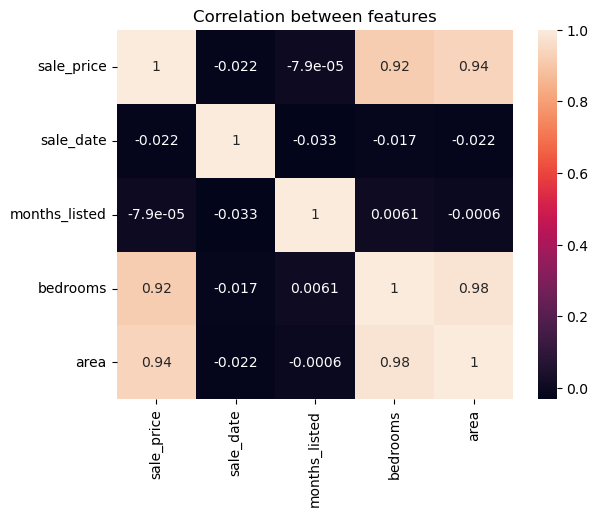

In [21]:
sns.heatmap(train_data_subset.corr(),annot=True)
plt.title('Correlation between features')

In [22]:
train_data.dtypes

house_id           int64
city              object
sale_price         int64
sale_date          int64
months_listed    float64
bedrooms           int64
house_type        object
area             float64
dtype: object

In [23]:
validation_data.dtypes

house_id           int64
city              object
sale_date          int64
months_listed    float64
bedrooms           int64
house_type        object
area             float64
dtype: object

In [24]:
validation_data.head()

,house_id,city,sale_date,months_listed,bedrooms,house_type,area
0,1331375,Teasdale,738292,7.7,3,Terraced,209.7
1,1630115,Teasdale,737606,6.5,4,Detached,390.6
2,1645745,Silvertown,737670,7.4,6,Detached,556.8
3,1336775,Silvertown,738066,8.8,3,Semi-detached,208.3
4,1888274,Silvertown,738319,5.7,4,Detached,389.2


In [25]:
X_train = train_data[['house_id','city', 'sale_date', 'months_listed', 'bedrooms', 'house_type','area']]

y_train = train_data['sale_price']

X_train = pd.get_dummies(X_train)

In [26]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
X_validation = pd.get_dummies(validation_data)
# Predict the sale prices for the validation data
predicted_prices = model.predict(X_validation)

# Create a DataFrame with house_id and predicted prices
base_result = pd.DataFrame({
    'house_id': validation_data['house_id'],
    'price': predicted_prices
})

print(base_result)

     house_id          price
0     1331375  122282.469877
1     1630115  303468.886619
2     1645745  383972.796908
3     1336775  124465.070123
4     1888274  271393.286287
5     1567679  277905.228016
6     1298770  330748.189195
7     1662892  -14102.042833
8     1514321  169092.579197
9     1795371  211465.573475
10    1872688  216356.308656
11    1115697  144751.704637
12    1752850  359253.725553
13    1298746  352550.729917
14    1464795  196337.867452
15    1982802  166971.119277
16    1823033  239195.850925
17    1585193  144123.284376
18    1843329  340181.066486
19    1424530   36185.272594
20    1040934  390799.559360
21    1483696  361512.530950
22    1436940  313681.389133
23    1608175   32786.532444
24    1902237  175926.004312
25    1563689  297390.187395
26    1976354  202374.457154
27    1872940  325806.060740
28    1704427  341872.014190
29    1131878  327477.764753
30    1803015   56224.292624
31    1897548  192628.044096
32    1739654  174251.899400
33    1658430 

# Task 5

Fit a comparison model to predict the sale price of a house.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “validation.csv” to predict new values based on your model. You must return a dataframe named `compare_result`, that includes `house_id` and `price`. The price column must be your predicted values.

In [28]:
# Use this cell to write your code for Task 5
from sklearn.ensemble import RandomForestRegressor

# Fit the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [29]:
# Predict the sale prices for the validation data
predicted_prices = model.predict(X_validation)

# Create a DataFrame with house_id and predicted prices
compare_result = pd.DataFrame({
    'house_id': validation_data['house_id'],
    'price': predicted_prices
})

print(compare_result)

     house_id      price
0     1331375   80309.93
1     1630115  303125.87
2     1645745  401481.27
3     1336775  106143.45
4     1888274  265037.92
5     1567679  280184.60
6     1298770  344361.00
7     1662892   38142.55
8     1514321  175386.33
9     1795371  214161.09
10    1872688  212817.41
11    1115697  144618.33
12    1752850  378504.08
13    1298746  360946.64
14    1464795  194545.98
15    1982802  167146.99
16    1823033  241243.28
17    1585193  110260.24
18    1843329  350371.16
19    1424530   44320.82
20    1040934  428536.90
21    1483696  381955.68
22    1436940  269578.38
23    1608175   43806.10
24    1902237  174519.08
25    1563689  277345.30
26    1976354  188135.88
27    1872940  323391.70
28    1704427  353653.97
29    1131878  329892.65
30    1803015   54566.20
31    1897548  189938.25
32    1739654  173382.14
33    1658430  214223.83
34    1282370  165056.80
35    1512890   70335.31
36    1597534  111220.53
37    1174073  276992.80
38    1179366  426980.49
